In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('doctors_consultation_fee.csv')

In [4]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
df.shape

(5961, 7)

In [6]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [9]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [10]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [11]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [13]:
df['Experience']=df['Experience'].str[0:2]

In [14]:
df.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


In [15]:
mode=df['Place'].mode()
mode[0]

'HSR Layout, Bangalore'

In [16]:
df['Place'].fillna(mode,inplace=True)

In [17]:
df['Place'] = df['Place'].replace(np.nan,mode)

In [18]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['Qualification'] = le1.fit_transform(df['Qualification']) 
le2 = LabelEncoder()
df['Place'] = le2.fit_transform(df['Place'].astype('str')) 
le3 = LabelEncoder()
df['Profile'] = le3.fit_transform(df['Profile']) 


In [20]:
df.dtypes

Qualification          int32
Experience            object
Rating                object
Place                  int32
Profile                int32
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [21]:
df.drop('Rating',axis=1,inplace=True)

In [22]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [23]:
df['Experience']=df['Experience'].astype(int)

In [24]:
df.head()

,Qualification,Experience,Place,Profile,Fees
0,401,24,299,5,100
1,73,12,866,0,350
2,1135,9,457,3,300
3,464,12,68,0,250
4,10,20,337,0,250


In [25]:
df.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
Fees             0
dtype: int64

In [26]:
df.isna().any()

Qualification    False
Experience       False
Place            False
Profile          False
Fees             False
dtype: bool

In [27]:
np.isnan(np.array([np.nan,0], dtype=np.float64))

array([ True, False])

In [28]:
df.dtypes

Qualification    int32
Experience       int32
Place            int32
Profile          int32
Fees             int64
dtype: object

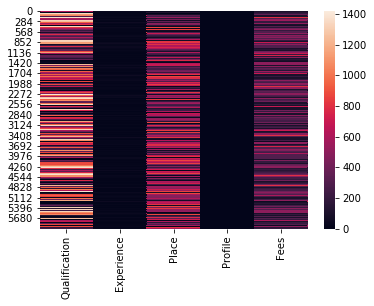

In [29]:
sns.heatmap(df)

In [30]:
dfcor=df.corr()
dfcor

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.134697,0.006321,0.393123,0.263214
Experience,0.134697,1.000000,0.000441,0.202073,0.002117
Place,0.006321,0.000441,1.000000,0.016631,-0.063510
Profile,0.393123,0.202073,0.016631,1.000000,0.145226
Fees,0.263214,0.002117,-0.063510,0.145226,1.000000


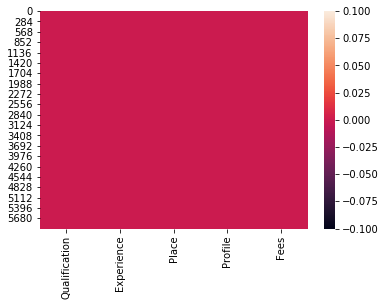

In [31]:
sns.heatmap(df.isnull())

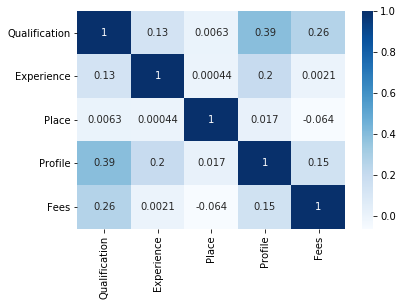

In [32]:
sns.heatmap(dfcor,cmap='Blues',annot=True)#most strongly positive related attributes are Profile and Qualification and only Place and Fees are strongly negatively related.This implies the higher the qualification, the higher the profile and then Fees is totally independent of the place

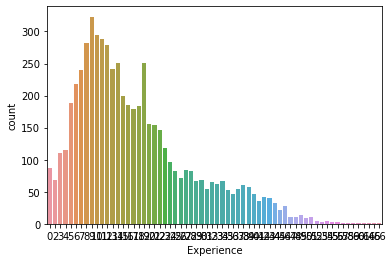

In [33]:
sns.countplot(df['Experience'])

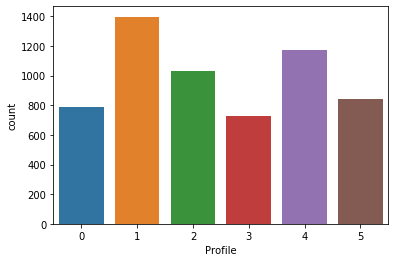

In [34]:
sns.countplot(df['Profile'])# there is an even spread of data here

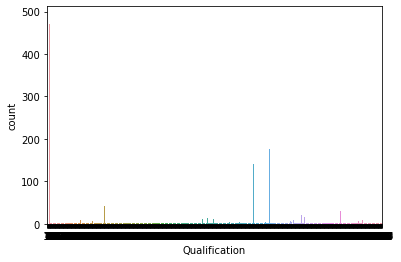

In [35]:
sns.countplot(df['Qualification'])

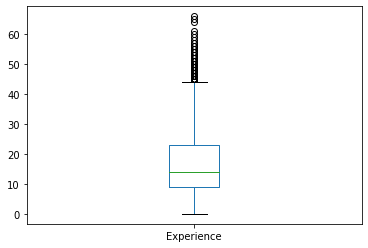

In [36]:
df['Experience'].plot.box()#outliers exists in this attribute

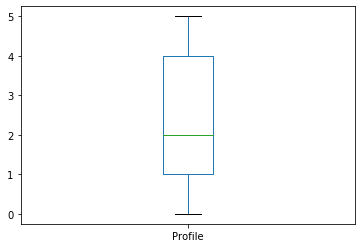

In [37]:
df['Profile'].plot.box()

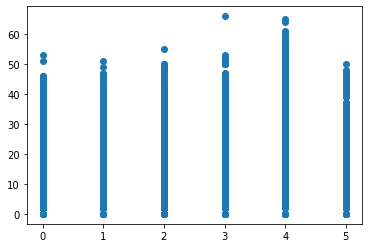

In [38]:
plt.scatter(df['Profile'],df['Experience'])

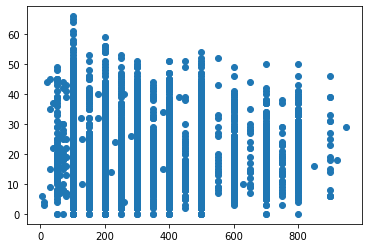

In [39]:
plt.scatter(df['Fees'],df['Experience'])

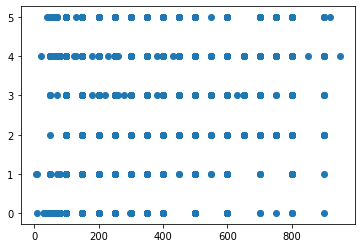

In [40]:
plt.scatter(df['Fees'],df['Profile'])

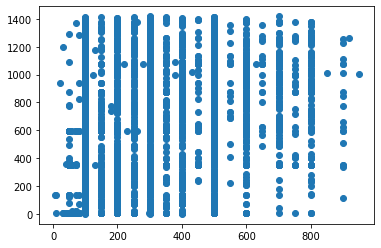

In [41]:
plt.scatter(df['Fees'],df['Qualification'])

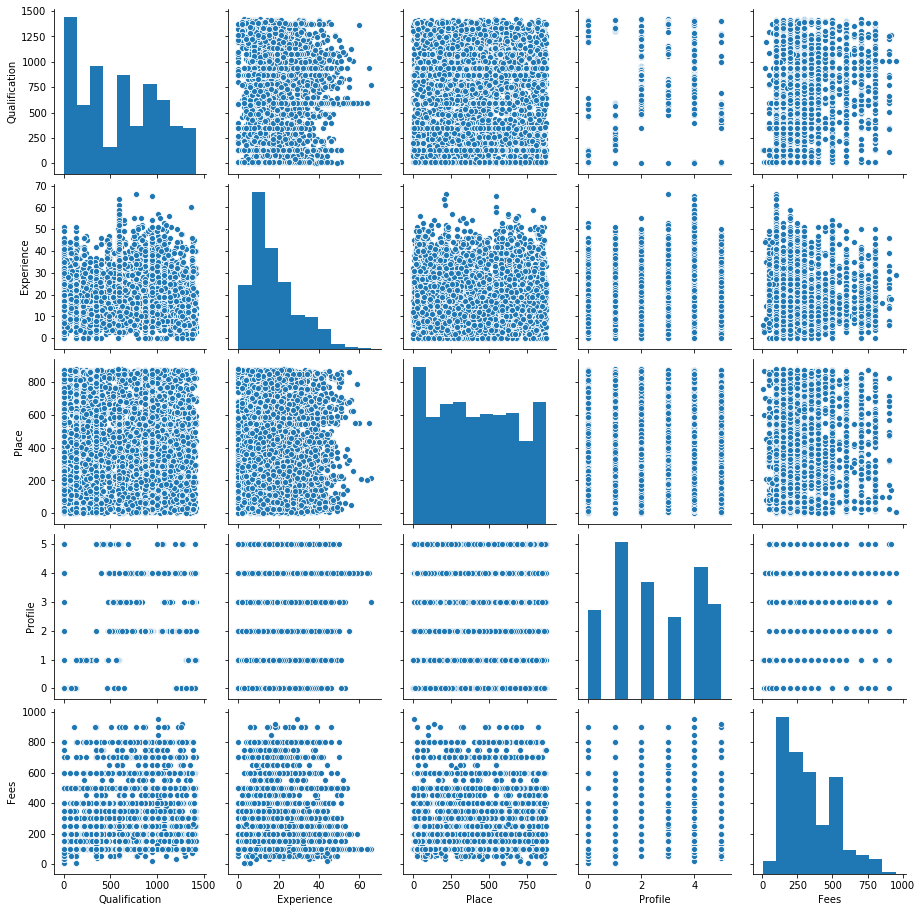

In [42]:
sns.pairplot(df)

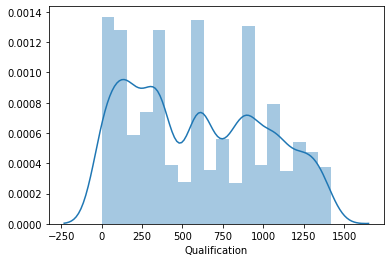

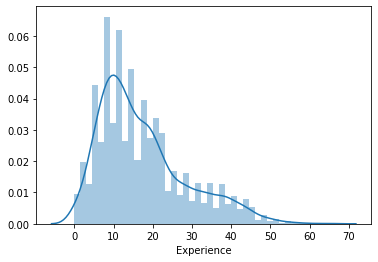

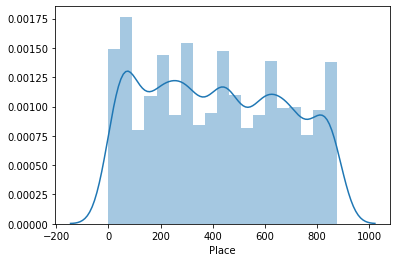

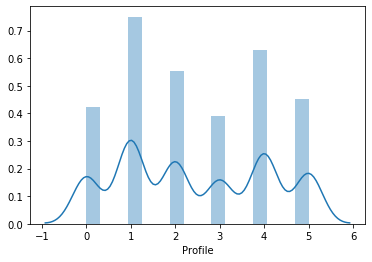

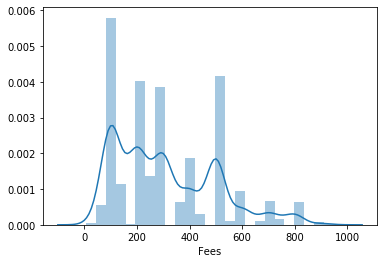

In [43]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [44]:
collist=df.columns.values
ncol=5
nrows=2

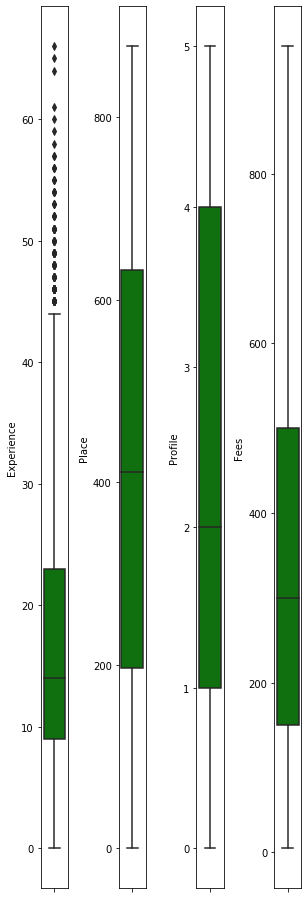

In [45]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()#outliers exists

In [46]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(5961, 5)
(5903, 5)


In [47]:
df1.skew()

Qualification    0.246857
Experience       0.897661
Place            0.119491
Profile          0.121336
Fees             0.710445
dtype: float64

In [48]:
Experience_sqrt=np.sqrt(df1['Experience'])
Experience_sqrt.skew()

0.023642368547053295

In [49]:
Fees_sqrt=np.sqrt(df1['Fees'])
Fees_sqrt.skew()

0.2214930789822519

In [50]:
x=df1.iloc[:,0:-1]
x.head()#separating the x and y variables

,Qualification,Experience,Place,Profile
0,401,24,299,5
1,73,12,866,0
2,1135,9,457,3
3,464,12,68,0
4,10,20,337,0


In [51]:
y=df1.iloc[:,-1]
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [52]:
x.shape,y.shape

((5903, 4), (5903,))

In [53]:
y=y.values.reshape(-1,1)

In [54]:
y.shape

(5903, 1)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93,test_size=0.24)

In [58]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    final_r_state = 0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
# calling the function 
maxr2_score(lm,x,y)

r2_score corresponding to random state;  42  is:  1.0
r2_score corresponding to random state;  43  is:  1.0
r2_score corresponding to random state;  44  is:  1.0
r2_score corresponding to random state;  45  is:  1.0
r2_score corresponding to random state;  46  is:  1.0
r2_score corresponding to random state;  47  is:  1.0
r2_score corresponding to random state;  48  is:  1.0
r2_score corresponding to random state;  49  is:  1.0
r2_score corresponding to random state;  50  is:  1.0
r2_score corresponding to random state;  51  is:  1.0
r2_score corresponding to random state;  52  is:  1.0
r2_score corresponding to random state;  53  is:  1.0
r2_score corresponding to random state;  54  is:  1.0
r2_score corresponding to random state;  55  is:  1.0
r2_score corresponding to random state;  56  is:  1.0
r2_score corresponding to random state;  57  is:  1.0
r2_score corresponding to random state;  58  is:  1.0
r2_score corresponding to random state;  59  is:  1.0
r2_score corresponding to ra

In [59]:
#final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.20)
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [60]:
#using cross validation to check over/under fitting
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score

array([1., 1., 1., 1., 1.])

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score: ',r2_score(y_test,y_pred))

RMSE is:  1.9346846919433418e-13
r2_score:  1.0


In [62]:
#saving the model
from sklearn.externals import joblib
filename='doctors_feefile.obj'

In [63]:
joblib.dump(lm,'doctors_feefile.obj')

['doctors_feefile.obj']